# Plotting Data in Python using Matplotlib

In this exercise, we will be plotting experimental data in Python using 'matplotlib'. (Explain what the purpose is of this exercise, why you will want this as an alternative to excel plots, and what some of the advantages are of using this method.)

First we need to import some libraries to setup the script

In [1]:
%pylab inline
import csv
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Next we have to import our data into the notebook. Our data is in a Comma Separated Values (.csv) file, we import the values into lists to use in our script. Next the values are loaded into a list. And to test that it worked, we print the list out to see the results.

In [2]:
with open('datafiles/labresults.csv', 'r') as file:
    reader = csv.reader(file)
    header_line = next(reader) #store the header into a separate file
    results_list = list(reader)
    print(results_list)

[['compound1', ' 10', ' 14'], ['compound2', ' 20', ' 570'], ['compound3', ' 30', ' 1302'], ['compound4', ' 40', ' 2838'], ['compound5', ' 50', ' 4212'], ['compound6', ' 60', ' 4590']]


We now have a list of tuples that contain the values for each measurement. There are three entries (or columns) in each tuple, and we want to create a graph based on this data. First define the x and the y axis. We can load this in the x and y from 'Results_list', but we do need to do some looping for that

In [3]:
x_results = []
y_results = []
for entries in results_list:
    x_results.append(entries[1])
    y_results.append(entries[2])

print(x_results)
print(y_results)

[' 10', ' 20', ' 30', ' 40', ' 50', ' 60']
[' 14', ' 570', ' 1302', ' 2838', ' 4212', ' 4590']


Now that we have the x and y points that need to be plotted, we can create the figure, create the axes and finally label them.

[Text(0,0.5,'Counts'),
 Text(0.5,0,'Concentration'),
 Text(0.5,1,'Labresults plot')]

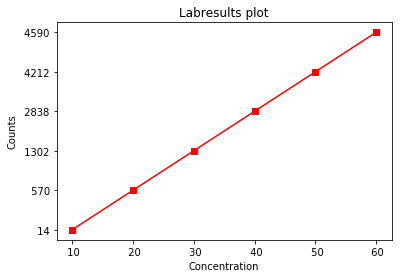

In [4]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.set_ylim(bottom=0, top=5000, auto=True)
ax.plot(x_results,y_results,'-sr') 
ax.set(title='Labresults plot',xlabel='Concentration',ylabel='Counts')

We now succesfully created a plot from our labdata. Fortunately, we have more data to plot. In the datafiles there is another sheet called 'Cellscreens.csv' and with this data we want to construct some plots. This sheet contains data on an experiment done on painkillers. First is the [Compound_name], then an abbrevation of a cancer type in the [Disease] column, a [Pain_rating] as a response to the painkiller where lower is better and finally the [Concentration] given of the compound.
Start by loading the data from the file to the notebook. (TIP: Separating the lines into two parts, splitting on the disease might help here)

In [5]:
with open('datafiles/Cellscreens.csv', 'r') as f:
    reader = csv.reader(f)
    header = next(reader) #store the header into a separate file
    cell_list = list(reader)
    cell_BRCA_list = cell_list[:36]
    cell_GBM_list = cell_list[36:]
    print(cell_BRCA_list)
    print(cell_GBM_list)

[['Morphine', ' BRCA', ' 5', ' 10'], ['Morphine', ' BRCA', ' 5', ' 15'], ['Morphine', ' BRCA', ' 4', ' 20'], ['Morphine', ' BRCA', ' 4', ' 25'], ['Morphine', ' BRCA', ' 4', ' 30'], ['Morphine', ' BRCA', ' 3', ' 35'], ['Codeine', ' BRCA', ' 5', ' 10'], ['Codeine', ' BRCA', ' 5', ' 15'], ['Codeine', ' BRCA', ' 5', ' 20'], ['Codeine', ' BRCA', ' 5', ' 25'], ['Codeine', ' BRCA', ' 5', ' 30'], ['Codeine', ' BRCA', ' 5', ' 35'], ['Fentanyl', ' BRCA', ' 3', ' 10'], ['Fentanyl', ' BRCA', ' 2', ' 15'], ['Fentanyl', ' BRCA', ' 2', ' 20'], ['Fentanyl', ' BRCA', ' 2', ' 25'], ['Fentanyl', ' BRCA', ' 1', ' 30'], ['Fentanyl', ' BRCA', ' 1', ' 35'], ['Tramadol', ' BRCA', ' 8', ' 10'], ['Tramadol', ' BRCA', ' 8', ' 15'], ['Tramadol', ' BRCA', ' 8', ' 20'], ['Tramadol', ' BRCA', ' 8', ' 25'], ['Tramadol', ' BRCA', ' 8', ' 30'], ['Tramadol', ' BRCA', ' 8', ' 35'], ['Oxycodone', ' BRCA', ' 7', ' 10'], ['Oxycodone', ' BRCA', ' 7', ' 15'], ['Oxycodone', ' BRCA', ' 7', ' 20'], ['Oxycodone', ' BRCA', ' 6', '

For our first plot, compare the pain ratings vs the concentration for Morphine. Do this by creating a solid line with square markers for both BRCA and GBM. Label the plot and lines accordingly.

[Text(0,0.5,'Pain Rating'),
 Text(0.5,0,'Concentration'),
 Text(0.5,1,'Morphine effect on pain rating')]

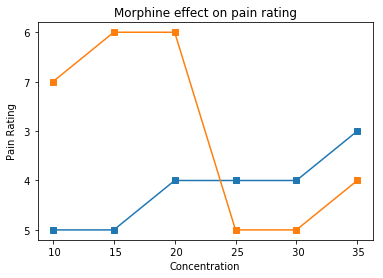

In [6]:
conc = []
morphine_pr_brca = []
morphine_pr_gbm = []
for morphine in cell_BRCA_list[:6]:
    conc.append(morphine[3])
    morphine_pr_brca.append(morphine[2])
for morphine in cell_GBM_list[:6]:
    morphine_pr_gbm.append(morphine[2])
ax = plt.gca()
ax.plot(conc, morphine_pr_brca,'s-', label='BRCA')
ax.plot(conc, morphine_pr_gbm,'s-', label='GBM')
ax.legend()
ax.set(title='Morphine effect on pain rating',xlabel='Concentration',ylabel='Pain Rating')